# Introduction

In my view, Python has the following advantages:
- Free for use
- Powerful packages
- Close to natural language
- Perfectly fit my research needs

Overall, the programming language is just a tool and is totally up to you. Choose the one you are comfortable with, then do your best to master it.

The programming environment I use:
- Anaconda - Jupyter Notebook
- Pycharm

They play roles in different situations.

My experiences in coding:
- The task-driven learning is an effective strategy. When you really solve a problem, you will realize the charm and value of programming.
- It is necessary to take a course or read a book systematically, but don't be shy about using Internet resources. We are all "Diaobaoxia".
- Some painful feelings are normal and happen to everyone without distinction. Meanwhile, pains are also treasure after you go through it.

You can sit aside, drink tea, read newspapers, leaving the computer work hard for you. The thing you only need to do is abide by its rules (write the right code).

![Debug](./Debug.png "https://zhuanlan.zhihu.com/p/45298171；https://zhuanlan.zhihu.com/p/21304838")

# Let's get start

In [1]:
import sys
import os

print("This Handout is based on:", sys.version)
print("The current running path is:", os.getcwd())

This Handout is based on: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
The current running path is: C:\Users\DELL\Desktop\仿真助教\Programming


# Program_set_1

![Program_set_1](./Program_set_1.png "Program_set_1")

![Exponential](./Exponential.png "Exponential")

Notes. The answer is unique, but the solution is not. My code below isn't the optimal solution, and its purpose is to help you understand how a M/M/1 queueing system works.

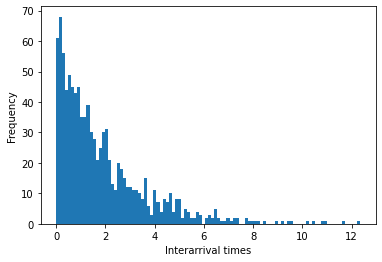

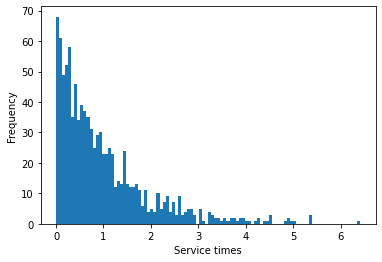

The average time in queue: 0.9522570225528777
The average time being serviced: 0.9792943282687459
The average time in system: 1.9315513508216235


In [10]:
# -*- coding:utf-8 -*-
# __author__ : Xiaoyan Liu, ID number: 201931051095
# __date__: 2022/11/19 19:00

import math
from math import pi
import matplotlib.pyplot as plt
import numpy as np


# [Part1.] Use the linear congruential generator to generate the U(0,1)
a = 16807
c = 0
m = 2147483647
II = 1155192169
SS = 1806794933
n = 0

Mean_interarrival = 2
Mean_service = 1
Ilist = []
Slist = []

while n <= 999:
    II = (a * II + c) % m
    IU = II/m
    I = - Mean_interarrival * math.log(IU)
    
    SS = (a * SS + c) % m
    SU = SS/m
    S = - Mean_service * math.log(SU)
    
    Ilist.append(I)
    Slist.append(S)
    n = n+1

plt.hist(Ilist,bins=100)
plt.xlabel("Interarrival times")
plt.ylabel("Frequency")
plt.show()

plt.hist(Slist,bins=100)
plt.xlabel("Service times")
plt.ylabel("Frequency")
plt.show()


# [Part2.] M/M/1队列：具有指数达到间隔时间、服务时间和先入先出排队规则的单服务台排队系统
# 第i位顾客到达的时间(绝对)：T(i)=I(1)+...+I(i-1)+I(i)
# 第i位顾客在队列中的时间(相对)：D(i)
# 第i位顾客在系统中的时间(相对)：X(i)=D(i)+S(i)
# 第i位顾客离去的时间(绝对)：L(i)=T(i)+X(i)

n = 0
T = 0
L = 0

Tlist = []
Dlist = []
Xlist = []
Llist = []

# 顾客按顺序依次考虑
while n <= 999:
    T = T+Ilist[n]
    
    if T<=L:
        D = L-T
        X = D+Slist[n]
        L = T+X
        
    if T>L:
        D = 0
        X = D+Slist[n]
        L = T+X

    Tlist.append(T)
    Dlist.append(D)
    Xlist.append(X)
    Llist.append(L)
    n = n+1


# [Part3.] Calculate and output results
ED = np.mean(Dlist)
ES = np.mean(Slist)
EX = np.mean(Xlist)

print('The average time in queue:',ED)
print('The average time being serviced:',ES)
print('The average time in system:',EX)

In [3]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Program_set_2

![Program_set_2](./Program_set_2.png "Program_set_2")

Notes. The answer is unique, but the solution is not. My code below isn't the optimal solution, and its purpose is to help you understand how a M/M/C queueing system works.

In [1]:
# -*- coding:utf-8 -*-
# __author__ : Xiaoyan Liu, ID number: 201931051095
# __date__: 2022/11/19 20:00

import math
from math import pi
import matplotlib.pyplot as plt
import numpy as np
import random


run = 10000
P1 = []
P2 = []

for m in range(run):
    
    # 生成100个随机顾客
    # Interarrival time for customers: 60 seconds
    # Alternative 1: 1 server, 54 seconds
    # Alternative 2: 2 servers, 108 seconds
    
    Mean_interarrival = 60
    Mean_service1 = 54
    Mean_service2 = 108

    Ilist = []
    S1list = []
    S2list = []

    for i in range(100):
        IU = random.random()
        I = - Mean_interarrival * math.log(IU)

        SU1 = random.random()
        S1 = - Mean_service1 * math.log(SU1)

        SU2 = random.random()
        S2 = - Mean_service2 * math.log(SU2)
        
        Ilist.append(I)
        S1list.append(S1)
        S2list.append(S2)

    # plt.hist(Ilist, bins=100)
    # plt.xlabel("Interarrival times")
    # plt.ylabel("Frequency")
    # plt.show()

    # plt.hist(S1list, bins=100)
    # plt.xlabel("Service1 times")
    # plt.ylabel("Frequency")
    # plt.show()

    # plt.hist(S2list, bins=100)
    # plt.xlabel("Service2 times")
    # plt.ylabel("Frequency")
    # plt.show()

    
    # 让每次 M/M/1 & M/M/2 两个系统的顾客都一样，以保证结果具有可比性
    # 第i位顾客到达的时间(绝对)：T(i)=I(0)+...+I(i-1)+I(i)
    # 第i位顾客在队列中的时间(相对)：D(i)
    # 第i位顾客在系统中的时间(相对)：X(i)=D(i)+S(i)
    # 第i位顾客离去的时间(绝对)：L(i)=T(i)+X(i)
    # performance measure: the average time in system
    
    T1 = 0
    L1 = 0
    
    T1list = []
    D1list = []
    X1list = []
    L1list = []
    T2list = []
    D2list = []
    X2list = []
    L2list = []
    
    # M/M/1队列
    n = 0
    while n <= 99:
        T1 = T1 + Ilist[n]

        if T1 <= L1:
            D1 = L1 - T1
            X1 = D1 + S1list[n]
            L1 = T1 + X1

        if T1 > L1:
            D1 = 0
            X1 = D1 + S1list[n]
            L1 = T1 + X1

        T1list.append(T1)
        D1list.append(D1)
        X1list.append(X1)
        L1list.append(L1)
        n = n + 1
        
        
    # M/M/2队列
    # 第一位顾客
    T2 = Ilist[0]
    D2 = 0
    X2 = S2list[0]
    L2 = T2 + S2list[0]
    T2list.append(T2)
    D2list.append(D2)
    X2list.append(X2)
    L2list.append(L2)
    # 第二位顾客
    T2 = Ilist[1]
    D2 = 0
    X2 = S2list[1]
    L2 = T2 + S2list[1]
    T2list.append(T2)
    D2list.append(D2)
    X2list.append(X2)
    L2list.append(L2)
    
    n = 2
    while n <= 99:
        T2 = T2 + Ilist[n]
        
        if T2 <= L2list[n-1]:
            if T2 <= L2list[n-2]:
                if L2list[n-1] <= L2list[n-2]:
                    D2 = L2list[n-1] - T2
                    X2 = D2 + S2list[n]
                    L2 = T2 + X2
                if L2list[n-1] > L2list[n-2]:
                    D2 = L2list[n-2] - T2
                    X2 = D2 + S2list[n]
                    L2 = T2 + X2
            if T2 > L2list[n-2]:
                D2 = 0
                X2 = D2 + S2list[n]
                L2 = T2 + X2
        
        if T2 > L2:
            D2 = 0
            X2 = D2 + S2list[n]
            L2 = T2 + X2
        
        T2list.append(T2)
        D2list.append(D2)
        X2list.append(X2)
        L2list.append(L2)
        n = n + 1
        
    
    PX1 = np.mean(X1list)
    P1.append(PX1)
    PX2 = np.mean(X2list)
    P2.append(PX2)

In [2]:
# QA.Construct the 95 confidence level for the average time in system for these two system

MEAN1 = np.mean(P1)
MEAN2 = np.mean(P2)

STD1 = np.std(P1)
STD2 = np.std(P2) 
# np.std求标准差默认除以n,是有偏的，无偏样本标准差加入参数 ddof=1

SE1 = STD1 / 100
SE2 = STD2 / 100

a1 = MEAN1-1.96*SE1
a2 = MEAN2-1.96*SE2
b1 = MEAN1+1.96*SE1
b2 = MEAN2+1.96*SE2

print('The 95 confidence level for the average time in system for these two system is:',str(1.96))

print('The 95 confidence interval for the average time in system for M/M/1:','(',a1,',',b1,')')
print('The 95 confidence interval for the average time in system for M/M/2:','(',a2,',',b2,')')

The 95 confidence level for the average time in system for these two system is: 1.96
The 95 confidence interval for the average time in system for M/M/1: ( 298.60032760466123 , 305.71406285831387 )
The 95 confidence interval for the average time in system for M/M/2: ( 165.65175301873668 , 167.55757250524093 )


In [3]:
# QB.If we want to make sure that the error is within 1 second (with a=0.01), how many more runs do we need to have?

more1 = math.ceil(2.58*STD1*2.58*STD1 -10000)  # 向上取整
more2 = math.ceil(2.58*STD2*2.58*STD1 -10000)

print('M/M/1 needs to have',more1,'more runs')
print('M/M/2 needs to have',more2,'more runs')

M/M/1 needs to have 209212 more runs
M/M/2 needs to have 48729 more runs


In [4]:
# QC.Compare these two systems and identify the best system with a probability of at least 95%

Z = [P1[i] - P2[i] for i in range(len(P1))]
MEANZ = np.mean(Z)
STDZ = np.std(Z,ddof=1)
SEZ = STDZ / 100
az = MEANZ - 1.96*SEZ
bz = MEANZ + 1.96*SEZ

print('The approximate 95 percent confidence interval is','(',az,',',bz,')')

The approximate 95 percent confidence interval is ( 132.0431195901228 , 139.06194534887473 )


In [ ]:
reset

# Program_set_3

![Program_set_3](./Program_set_3.png "Program_set_3")


<center><font size="4"><font color=DarkViolet>Get Your Hands Dirty!</font>
    
    ***

# Learning resources

- 课程：北师大龚伟老师《Python科学计算》、莫烦网站（https://mofanpy.com/ ）、B站
- 图书：《利用Python进行数据分析·第2版》：https://www.jianshu.com/p/04d180d90a3f
- 手册：https://www.runoob.com/python/python-tutorial.html
- 博客：CSDN、Google
- ......

If you have any questions about this handout, please give feedback to liuxiaoyan89@mail.bnu.edu.cn or gudan213213 (WeChat)